In [1]:
# Imports
import math
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
sns.set(style='darkgrid')

# **Linear Regression-I**

**A. Dataset Creation**

In [3]:
# i). Dataset Generation
beta0, beta1, beta2 = 1.25, 1.5, 1.75
def gen2d(n):
    # Mean and Standard Deviation
    mu, sigma = 0, 1
    # Generating Dimension-1 of X
    dim1 = np.random.normal(mu, sigma, n)
    # Generating Dimension-2 of X
    dim2 = np.random.normal(mu, sigma, n)
    # Stacking Them
    x = np.stack((dim1, dim2), axis=1)
    # Generating 'y'
    y = beta0*np.ones((1,1500)) + beta1*dim1 + beta2*dim2
    return x, y.reshape((1500,1))

# Generate Dataset
n = 1500
X, y = gen2d(n)

In [4]:
# ii). Create a train-test split of 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

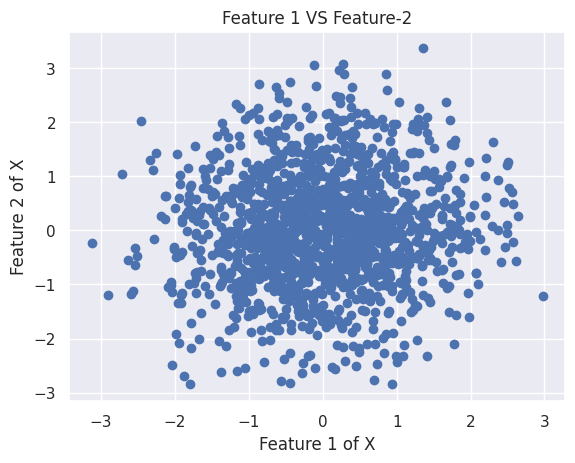

In [5]:
# iii). Plot Dim-1 and Dim-2 of X
plt.scatter(X[:,0],X[:,1])
plt.title("Feature 1 VS Feature-2")
plt.xlabel("Feature 1 of X")
plt.ylabel("Feature 2 of X")
plt.show()

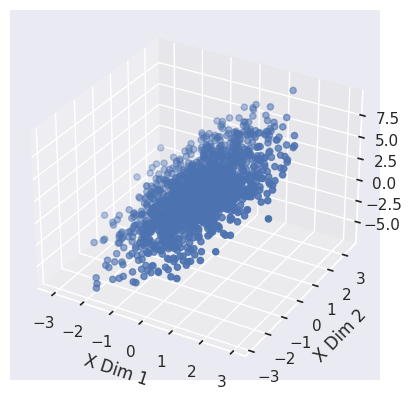

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('X Dim 1')
ax.set_ylabel('X Dim 2')
ax.set_zlabel('y')
plt.show();

**B. Modelling**

In [7]:
# i). Scikit-Learn Library Linear Regression Model
linearReg = LinearRegression().fit(X_train, y_train)
p1 = []
p1.append(linearReg.intercept_[0])
p1.append(linearReg.coef_[0][0])
p1.append(linearReg.coef_[0][1])
print(p1)

[1.2499999999999998, 1.5000000000000007, 1.7500000000000009]


In [8]:
# ii). Linear Regression From Scratch

# Epochs
iters = 2000
# Learning Rate
eta = 0.01
# Initialise With Zeros
theta = np.zeros((3,1))

def compCost(X, y, theta):
    tempval = np.dot(X, theta) - y
    return np.sum(np.power(tempval, 2)) / (2*X.shape[0])


def gradDes(X, y, theta, eta, iters):
    # X is [feature-1,feature-2] we want [1,feature-1,feature-2] to perform matrix dot-product
    ones = np.ones((1500,1))
    mat_X = np.concatenate((ones, X), axis = 1)
    # Cost List
    cost = []

    for _ in range(iters):
        y_pred = np.dot(mat_X,theta).reshape((1500,1))
        # Calculate Gradients
        gradient = np.dot(mat_X.T,y_pred-y)/X.shape[0]
        # Weight Update
        theta = theta - eta * gradient
        # Append To Cost List
        cost.append(compCost(mat_X, y, theta))
    return theta, cost

theta, cost = gradDes(X, y, theta, eta, iters)
print(theta)

[[1.25      ]
 [1.49999999]
 [1.75      ]]


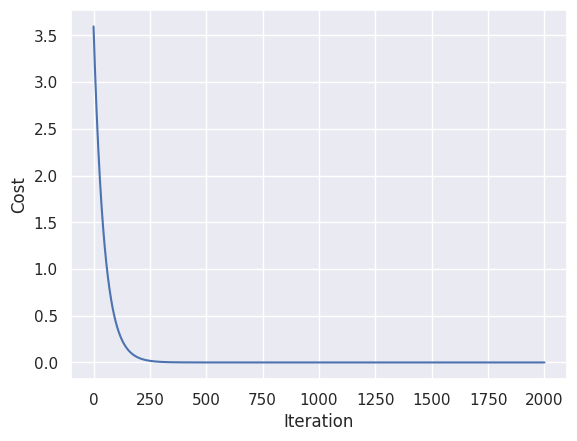

In [9]:
# iii). Plot Loss at Each Iteration
plt.plot(np.linspace(0,iters,iters), cost)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

**C. Metrics**

In [10]:
# i). Root Mean Square Error, Mean Absolute Error and Normalised Root Mean Square Error on the test set

def rmse(X, y, linearReg, theta):
    # Built-in Model
    y_pred1 = linearReg.predict(X)
    rmse1 = math.sqrt(mean_squared_error(y, y_pred1))
    # For From Scratch Model
    ones = np.ones((X.shape[0],1))
    mat_X = np.concatenate((ones, X), axis = 1)
    y_pred2 = np.dot(mat_X,theta).reshape((X.shape[0],1))
    rmse2 = math.sqrt(mean_squared_error(y, y_pred2))

    print(f'The RMSE for Built-in Model is {rmse1}')
    print(f'The RMSE for from Scratch Model is {rmse2}')
rmse(X_test, y_test, linearReg, theta)

The RMSE for Built-in Model is 1.119066121066391e-15
The RMSE for from Scratch Model is 7.545540966734175e-09


In [11]:
def mae(X, y, linearReg, theta):
    # Built-in Model
    y_pred1 = linearReg.predict(X)
    mae1 = math.sqrt(mean_absolute_error(y, y_pred1))
    # For From Scratch Model
    ones = np.ones((X.shape[0],1))
    mat_X = np.concatenate((ones, X), axis = 1)
    y_pred2 = np.dot(mat_X,theta).reshape((X.shape[0],1))
    mae2 = math.sqrt(mean_absolute_error(y, y_pred2))

    print(f'The MAE for Built-in Model is {mae1}')
    print(f'The MAE for from Scratch Model is {mae2}')
mae(X_test, y_test, linearReg, theta)

The MAE for Built-in Model is 2.9435294327296088e-08
The MAE for from Scratch Model is 7.69802416584819e-05


In [12]:
def norm_rmse(X, y, linearReg, theta):
    # Built-in Model
    y_pred1 = linearReg.predict(X)
    norm_rmse1 = math.sqrt(mean_squared_error(y,y_pred1))/np.std(y)
    # For From Scratch Model
    ones = np.ones((X.shape[0],1))
    mat_X = np.concatenate((ones, X), axis = 1)
    y_pred2 = np.dot(mat_X,theta).reshape((X.shape[0],1))
    norm_rmse2 = math.sqrt(mean_squared_error(y,y_pred2))/np.std(y)

    print(f'The Normalised RMSE for Built-in Model is {norm_rmse1}')
    print(f'The Normalised RMSE for from Scratch Model is {norm_rmse2}')
norm_rmse(X_test, y_test, linearReg, theta)

The Normalised RMSE for Built-in Model is 5.018762366033219e-16
The Normalised RMSE for from Scratch Model is 3.3840071039878006e-09


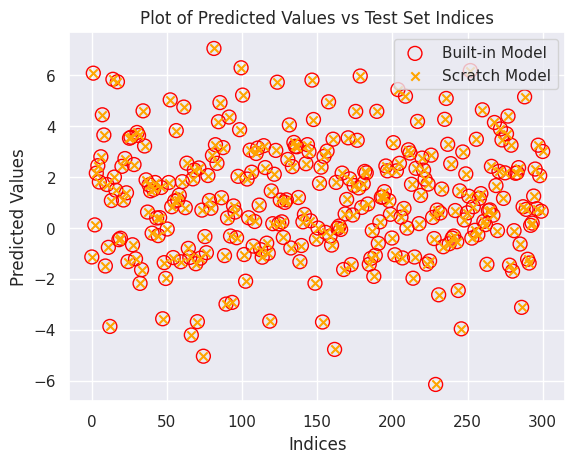

In [13]:
# ii). Predicted Value vs Actual Value For Both Weights

y_pred_builtin = linearReg.predict(X_test)
ones = np.ones((X_test.shape[0],1))
mat_X = np.concatenate((ones, X_test), axis = 1)
y_pred_scratch = np.dot(mat_X,theta).reshape((X_test.shape[0],1))


# Predicted Value vs the Test Set Indices
plt.scatter(np.linspace(0,len(y_test), len(y_test)), y_pred_builtin, s = 100, facecolors = "none", edgecolors = "red")
plt.scatter(np.linspace(0,len(y_test), len(y_test)), y_pred_scratch, marker = "x", color = "orange")
plt.xlabel("Indices")
plt.ylabel("Predicted Values")
plt.legend(["Built-in Model", "Scratch Model"])
plt.title("Plot of Predicted Values vs Test Set Indices")
plt.show()

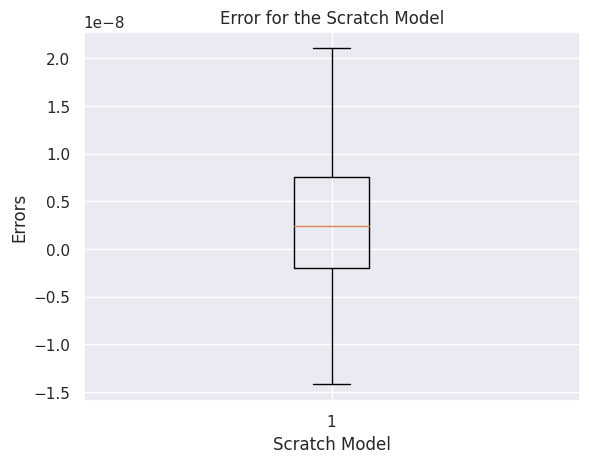

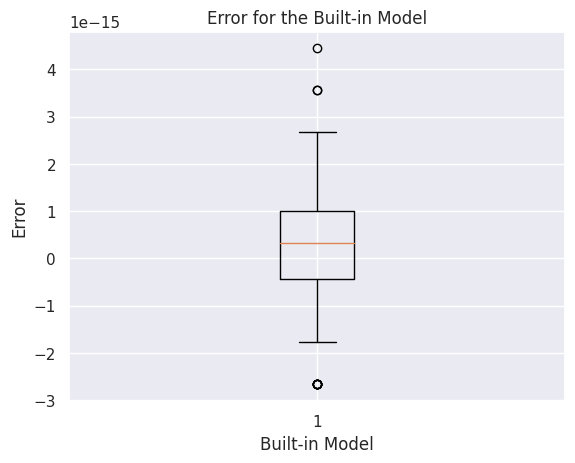

In [14]:
# iii). Box-plot of Errors

# Scratch Model
plt.boxplot(y_test-y_pred_scratch)
plt.xlabel("Scratch Model")
plt.ylabel("Errors")
plt.title("Error for the Scratch Model")
plt.show()

# Built-in model
plt.boxplot(y_test-y_pred_builtin)
plt.xlabel("Built-in Model")
plt.ylabel("Error")
plt.title("Error for the Built-in Model")
plt.show()

In [17]:
# iv). Difference in Weights (Actual and Obtained)

# Built-in Model
print("For Built-in Model: ")
print(f'For w0 diff: {beta0-p1[0]}')
print(f'For w0 diff: {beta1-p1[1]}')
print(f'For w0 diff: {beta2-p1[2]}')

#  Model
print("For Scratch Model: ")
print(f'For w0 diff: {beta0-theta[0]}')
print(f'For w0 diff: {beta1-theta[1]}')
print(f'For w0 diff: {beta2-theta[2]}')

For Built-in Model: 
For w0 diff: 2.220446049250313e-16
For w0 diff: -6.661338147750939e-16
For w0 diff: -8.881784197001252e-16
For Scratch Model: 
For w0 diff: [2.59357957e-09]
For w0 diff: [6.93525726e-09]
For w0 diff: [-2.64989675e-09]
